In [2]:
from deepul.hw4_helper import *
import warnings
warnings.filterwarnings('ignore')

# Question 1: Warmup [20pt]

In this question, we will train 2 different variants of GANs on an easy 1D dataset. 

Execute the cell below to visualize our datasets.

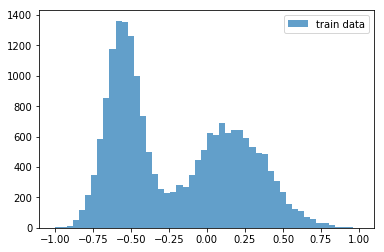

In [2]:
visualize_q1_dataset()

## Part 1(a)
In this part, we'll train our generator and discriminator via the original minimax GAN objective:
<insert GAN Objective here>
$$min_{G} max_{D} \mathbb{E}_{x \sim p_{data}} [\log D(x)] + \mathbb{E}_{z \sim p(z)}[\log (1-D(G(z)))]$$

Use an MLP for both your generator and your discriminator, and train until the generated distribution resembles the target distribution. 
  """
  train_data: An (20000, 1) numpy array of floats in [-1, 1]

  Returns
  - a (# of training iterations,) numpy array of discriminator losses evaluated every minibatch
  - a numpy array of size (5000,) of samples drawn from your model at epoch #1
  - a numpy array of size (1000,) linearly spaced from [-1, 1]; hint: np.linspace
  - a numpy array of size (1000,), corresponding to the discriminator output (after sigmoid) 
      at each location in the previous array at epoch #1

  - a numpy array of size (5000,) of samples drawn from your model at the end of training
  - a numpy array of size (1000,) linearly spaced from [-1, 1]; hint: np.linspace
  - a numpy array of size (1000,), corresponding to the discriminator output (after sigmoid) 
      at each location in the previous array at the end of training
  """


### Solution

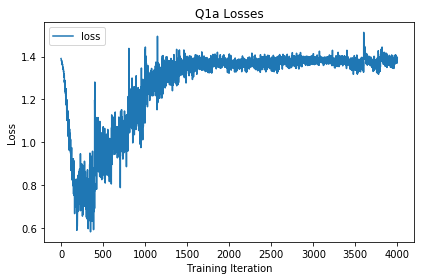

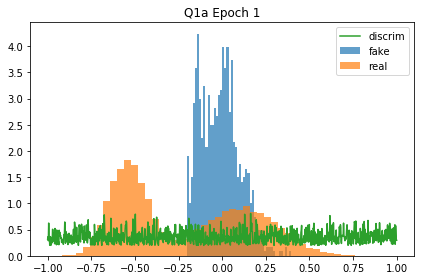

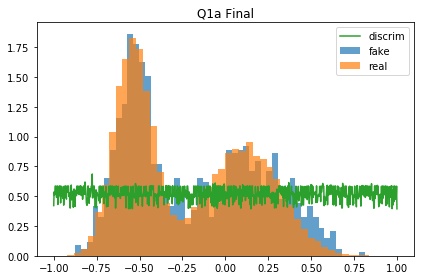

In [96]:
from deepul.hw4_helper import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
def classify(G, D,G_optimizer, D_optimizer, loader, latent=1):
    G.eval()
    D.train()
    D_loss = []
    G_loss = []
    bs = 0
    for data in loader:
        z = torch.normal(torch.zeros(data.shape[0], latent).cuda(), torch.ones(data.shape[0], latent).cuda())
        out = D(data.float().cuda()).squeeze()
        loss_ =  - out.log().mean() - (1 - D(G(z.float().cuda()))).squeeze().log().mean()
        D_optimizer.zero_grad()
        loss_.backward(retain_graph=True)
        D_optimizer.step()
        D_loss.append(loss_.item())
    D.eval()
    G.train()
    z = torch.normal(torch.zeros(data.shape[0], latent).cuda(), torch.ones(data.shape[0], latent).cuda())
    G_optimizer.zero_grad()
    out = D(G(z.float().cuda()))
    _loss =  torch.log(1-out).mean()
    _loss.backward()
    G_optimizer.step()
    G_loss.append(_loss.item())
    return G_loss, D_loss
    
    
class Generator(nn.Module):
    def __init__(self, latent=1, hidden=128):
        super().__init__()
        self.linear1 = nn.Linear(latent, hidden)
        self.linear2 = nn.Linear(hidden, hidden)
        self.linear3 = nn.Linear(hidden, hidden)
        self.linear4 = nn.Linear(hidden, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        return F.tanh(self.linear4(x))
    
class Disciminator(nn.Module):
    def __init__(self, hidden=32):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden)
        self.linear2 = nn.Linear(hidden, hidden)
        self.linear3 = nn.Linear(hidden, hidden)
        self.linear4 = nn.Linear(hidden, 1)
        self.relu = nn.ReLU(0.2)
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        return F.sigmoid(self.linear4(x))


def q1_a(train_data):
    batch_size = 100
    no_samples = 1000
    latent=1
    z = torch.normal(torch.zeros(no_samples, latent).cuda(), torch.ones(no_samples, latent).cuda())
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    G = Generator().cuda()
    D = Disciminator().cuda()
    G_optimizer = torch.optim.Adam(G.parameters(), lr=0.001, betas=(0, 0.9))
    D_optimizer = torch.optim.Adam(D.parameters(), lr=0.001, betas=(0, 0.9))
    loss1, loss2 = [], []
    for i in tqdm(range(20)):
        g_loss, d_loss = classify(G, D, G_optimizer, D_optimizer, train_loader)
        if i == 0:
            G.eval()
            D.eval()
            samples1 = G(z.float().cuda())
            dis1 = D(samples1).squeeze()
        loss1.append(g_loss)
        loss2.extend(d_loss)
    G.eval()
    D.eval()
    z = torch.normal(torch.zeros(no_samples, latent).cuda(), torch.ones(no_samples, latent).cuda())
    samplesEnd = G(z.float().cuda())
    disEnd = D(samplesEnd.cuda()).squeeze()
    return loss2, samples1.detach().cpu().numpy(), np.linspace(-1, 1, 1000), dis1.detach().cpu().numpy(), samplesEnd.detach().cpu().numpy(), np.linspace(-1, 1, 1000), disEnd.detach().cpu().numpy()
q1_save_results('a', q1_a)

## Part 1(b)
Here, we'll use the non-saturating formulation of the GAN objective. Now, we have two separate losses:
$$L^{(D)} = \mathbb{E}_{x \sim p_{data}} [\log D(x)] + \mathbb{E}_{z \sim p(z)}[\log (1-D(G(z)))]$$
$$L^{(G} = - \mathbb{E}_{z \sim p(z)} \log(D(G(z))$$
  """
  train_data: An (20000, 1) numpy array of floats in [-1, 1]

  Returns
  - a (# of training iterations,) numpy array of discriminator losses evaluated every minibatch
  - a numpy array of size (5000,) of samples drawn from your model at epoch #1
  - a numpy array of size (100,) linearly spaced from [-1, 1]; hint: np.linspace
  - a numpy array of size (100,), corresponding to the discriminator output (after sigmoid) 
      at each location in the previous array at epoch #1

  - a numpy array of size (5000,) of samples drawn from your model at the end of training
  - a numpy array of size (1000,) linearly spaced from [-1, 1]; hint: np.linspace
  - a numpy array of size (1000,), corresponding to the discriminator output (after sigmoid) 
      at each location in the previous array at the end of training
  """

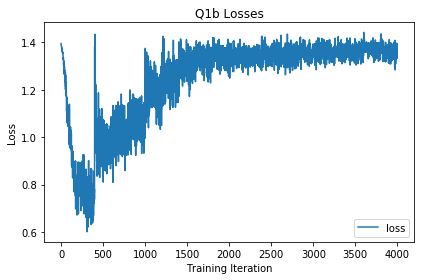

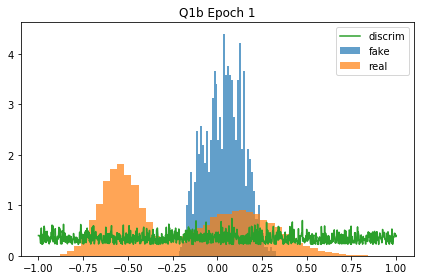

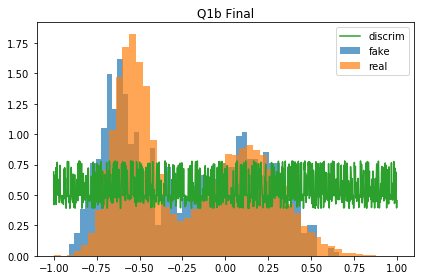

In [97]:
from deepul.hw4_helper import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
#change generator loss from - torch.log(1-out).mean() to - torch.log(out).mean(), rest same.
def classify(G, D,G_optimizer, D_optimizer, loader, latent=1):
    G.eval()
    D.train()
    D_loss = []
    G_loss = []
    bs = 0
    for data in loader:
        z = torch.normal(torch.zeros(data.shape[0], latent).cuda(), torch.ones(data.shape[0], latent).cuda())
        out = D(data.float().cuda()).squeeze()
        loss_ =  - out.log().mean() - (1 - D(G(z.float().cuda()))).squeeze().log().mean()
        D_optimizer.zero_grad()
        loss_.backward(retain_graph=True)
        D_optimizer.step()
        D_loss.append(loss_.item())
    D.eval()
    G.train()
    z = torch.normal(torch.zeros(data.shape[0], latent).cuda(), torch.ones(data.shape[0], latent).cuda())
    G_optimizer.zero_grad()
    out = D(G(z.float().cuda()))
    _loss =  - torch.log(out).mean()
    _loss.backward()
    G_optimizer.step()
    G_loss.append(_loss.item())
    return G_loss, D_loss
    
    
class Generator(nn.Module):
    def __init__(self, latent=1, hidden=128):
        super().__init__()
        self.linear1 = nn.Linear(latent, hidden)
        self.linear2 = nn.Linear(hidden, hidden)
        self.linear3 = nn.Linear(hidden, hidden)
        self.linear4 = nn.Linear(hidden, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        return F.tanh(self.linear4(x))
    
class Disciminator(nn.Module):
    def __init__(self, hidden=32):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden)
        self.linear2 = nn.Linear(hidden, hidden)
        self.linear3 = nn.Linear(hidden, hidden)
        self.linear4 = nn.Linear(hidden, 1)
        self.relu = nn.ReLU(0.2)
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        return F.sigmoid(self.linear4(x))


def q1_b(train_data):
    batch_size = 100
    no_samples = 1000
    latent=1
    z = torch.normal(torch.zeros(no_samples, latent).cuda(), torch.ones(no_samples, latent).cuda())
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    G = Generator().cuda()
    D = Disciminator().cuda()
    G_optimizer = torch.optim.Adam(G.parameters(), lr=0.001, betas=(0, 0.9))
    D_optimizer = torch.optim.Adam(D.parameters(), lr=0.001, betas=(0, 0.9))
    loss1, loss2 = [], []
    for i in tqdm(range(20)):
        g_loss, d_loss = classify(G, D, G_optimizer, D_optimizer, train_loader)
        if i == 0:
            G.eval()
            D.eval()
            samples1 = G(z.float().cuda())
            dis1 = D(samples1).squeeze()
        loss1.append(g_loss)
        loss2.extend(d_loss)
    G.eval()
    D.eval()
    z = torch.normal(torch.zeros(no_samples, latent).cuda(), torch.ones(no_samples, latent).cuda())
    samplesEnd = G(z.float().cuda())
    disEnd = D(samplesEnd.cuda()).squeeze()
    return loss2, samples1.detach().cpu().numpy(), np.linspace(-1, 1, 1000), dis1.detach().cpu().numpy(), samplesEnd.detach().cpu().numpy(), np.linspace(-1, 1, 1000), disEnd.detach().cpu().numpy()
q1_save_results('b', q1_a)

# Question 3: Representation Learning with BiGAN on MNIST [45pt]

In this part, we train a BiGAN on the MNIST dataset.

In BiGAN, in addition to training a generator $G$ and a discriminator $D$, we train an encoder $E$ that maps from real images $x$ to latent codes $z$. The discriminator now must learn to jointly identify fake $z$, fake $x$, and paired $(x, z)$ that don't belong together. In the original [BiGAN paper](https://arxiv.org/pdf/1605.09782.pdf), they prove that the optimal $E$ learns to invert the generative mapping $G: z \rightarrow x$. Our overall minimax term is now
$$V(D, E, G) = \mathbb{E}_{x \sim p_x}[\mathbb{E}_{z \sim p_E(\cdot | x)}[\log D(x, z)]] + \mathbb{E}_{z \sim p_z}[\mathbb{E}_{x \sim p_G(\cdot | z)}[\log (1 - D(x, z))]]$$

**Architecture**

We will closely follow the MNIST architecture outlined in the original BiGAN paper, Appendix C.1, with one modification: instead of having $z \sim \text{Uniform}[-1, 1]$, we use $z \sim \mathcal N (0, 1)$ with $z \in \mathbb R ^{50}$. 

**Hyperparameters**

We make several modifications to what is listed in the BiGAN paper. We apply $l_2$ weight decay to all weights and decay the step size $\alpha$ linearly to 0 over the course of training. Weights are initialized via the default PyTorch manner. We recommend training for at least 100 epochs -- this part is much less computationally expensive than previous homeworks. 

**Reconstructions**

You should take the first 20 images from the MNIST training set and then display the reconstructions $x_{recon} = G(E(x))$. It's ok if your reconstructions are somewhat lossy; ours are too. We will provide a utility to show these. 

**Testing the representation**

We want to see how good a linear classifier $L$ we can learn such that 
$$y \approx L(E(x))$$
where $y$ is the appropriate label. Fix $E$ and learn a weight matrix $W$ such that your linear classifier is composed of passing $x$ through $E$, then multiplying by $W$, then applying a softmax nonlinearity. Train this via gradient descent with the cross-entropy loss. 

As a baseline, randomly initialize another network $E_{random}$ with the same architecture, fix its weights, and train a linear classifier on top, as done in the previous part.


**You will provide the following deliverables**
1. Plot of the minimax loss term. 
2. 100 samples from the BiGAN
3. A comparison of MNIST images $x$ with their reconstructions $G(E(x))$.
4. Test loss plot for the linear classifier trained on the pretrained encoder, and a randomly initialized encoder. 
5. Final test losses for the two linear classifiers. 

**Feel free to train the networks separately, save the necessary information, and simply use our function to generate the appropriate figures.**


In [0]:
from deepul.hw4_helper import *
import warnings
warnings.filterwarnings('ignore')
class Generator(nn.Module):
    def __init__(self, num_latent=50, hidden_size=1024, output_size=784):
        super().__init__()
        self.hidden1 = nn.Linear(num_latent, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.hidden3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(hidden_size, affine=False)
        
    def forward(self, z):
        z = self.relu(self.hidden1(z))
        z = self.relu(self.bn(self.hidden2(z)))
        return F.tanh(self.hidden3(z))

class Discriminator(nn.Module):
    def __init__(self, num_latent=50, hidden_size=1024):
        super().__init__()
        self.hidden1 = nn.Linear(num_latent + 784, hidden_size)
        self.relu = nn.LeakyReLU(0.2)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.bn = nn.BatchNorm1d(hidden_size, affine=False)
        self.hidden3 = nn.Linear(hidden_size, 1)
        
    def forward(self, z, x):
        x = torch.cat((z, x), dim=1)
        x = self.relu(self.hidden1(x))
        x = self.relu(self.bn(self.hidden2(x)))
        return F.sigmoid(self.hidden3(x))
    
class Encoder(nn.Module):
    def __init__(self, num_latent=50, hidden_size=1024):
        super().__init__()
        self.hidden1 = nn.Linear(784, hidden_size)
        self.relu = nn.LeakyReLU(0.2)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.bn = nn.BatchNorm1d(hidden_size, affine=False)
        self.hidden3 = nn.Linear(hidden_size, num_latent)
        
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.bn(self.hidden2(x)))
        return self.hidden3(x)
    
class Classifier(nn.Module):
    def __init__(self, num_latent=50, output_size=10):
        super().__init__()
        self.linear = nn.Linear(num_latent, output_size)
    
    def forward(self, x):
        x = self.linear(x)
        return F.log_softmax(x)

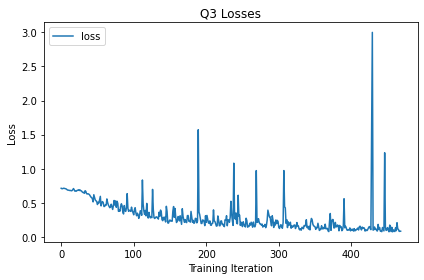

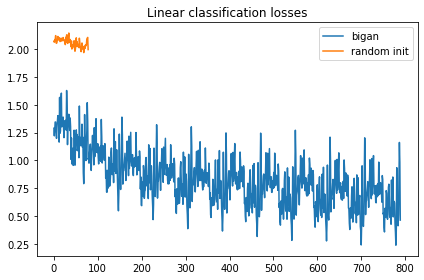

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


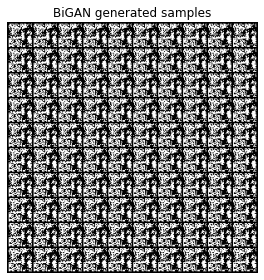

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


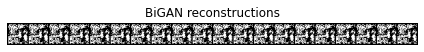

BiGAN final linear classification loss: 0.46361836791038513
Random encoder linear classification loss: 1.9965248107910156


In [0]:
from torch.utils import data
import numpy as np
from tqdm import tqdm_notebook as tqdm
def train_models(E, D, G, D_optimizer, GE_optimizer, train_loader, test_loader, 
                 epochs=1, num_latent=50):
    loss = []

    for epoch in tqdm(range(epochs), desc='GAN'):
        GE_scheduler = torch.optim.lr_scheduler.LambdaLR(GE_optimizer, lambda epoch: (epochs - epoch) / epochs, last_epoch=-1)
        D_scheduler = torch.optim.lr_scheduler.LambdaLR(D_optimizer,lambda epoch: (epochs - epoch) / epochs, last_epoch=-1)
        for i, data_ in enumerate(train_loader):
            D.train()
            E.eval()
            G.eval()
            x = data_[0].reshape(data_[0].shape[0], 784)
            z = torch.normal(torch.zeros(x.shape[0], num_latent))
            D_optimizer.zero_grad()
            D_loss = (- torch.log(D(x.cuda(), E(x.cuda()))).mean() - torch.log(1 - D(z.cuda(), G(z.cuda()))).mean())/2.0 
            loss.append(D_loss.item())
            D_loss.backward(retain_graph=True)
            D_optimizer.step()
            z = torch.normal(torch.zeros(x.shape[0], num_latent))
            D.eval()
            E.train()
            G.train()
            GE_optimizer.zero_grad()
            GE_loss = (torch.log(D(x.cuda(), E(x.cuda()))).mean() + torch.log(1 - D(z.cuda(), G(z.cuda()))).mean())/2.0 
            GE_loss.backward()
            GE_optimizer.step()
        GE_scheduler.step()
        D_scheduler.step()
            
    return loss

def reconstructImages(E, G, data):
    E.eval()
    G.eval()
    x = next(iter(data))[0] 
    images = G(E(x.reshape(x.shape[0], 784).cuda()))
    return images.reshape(-1, 28, 28, 1).detach().cpu().numpy() 
    
def classify(train_loader, test_loader, C, E, C_optimizer, criterion, epochs=1):
    train_loss, test_loss = [], [] 
    for epoch in tqdm(range(epochs), desc='Classifier'):
        C.train()
        E.eval()
        for data_ in train_loader:
            data, target = data_[0].reshape(data_[0].shape[0], 784), data_[1]
            out = C(E(data.cuda()))
            C_optimizer.zero_grad()
            loss = criterion(out, target.cuda())
            train_loss.append(loss.item())
            loss.backward()
            C_optimizer.step()
            
        C.eval()
        for data_ in test_loader:
            data, target = data_[0].reshape(data_[0].shape[0], 784), data_[1]
            out = C(E(data.cuda()))
            loss = criterion(out, target.cuda())
            test_loss.append(loss.item())
            
    return test_loss

def get_generator_samples(G, num_latent=50, num_samples=100):
    G.eval()
    z = torch.normal(torch.zeros(num_samples, num_latent))
    return G(z.cuda()).reshape(num_samples, 1, 28, 28).detach().cpu().numpy().transpose(0, 2, 3, 1) 

def q3(train_data, test_data):
    num_latent = 32
    E = Encoder(num_latent=num_latent).cuda()
    D = Discriminator(num_latent=num_latent).cuda()
    G = Generator(num_latent=num_latent).cuda()
    C = Classifier().cuda()
    train_loader = data.DataLoader(train_data, shuffle=True, batch_size=512)
    test_loader = data.DataLoader(test_data, batch_size=512)
    D_optimizer = torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0, 0.9))
    GE_optimizer = torch.optim.Adam(list(E.parameters())+list(G.parameters()), lr=1e-4,  weight_decay=2e-4, betas=(0, 0.9))
    
    C_optimizer = torch.optim.Adam(C.parameters(), lr=1e-4)
    criterion = nn.NLLLoss()
    random_init_loss = classify(train_loader, test_loader, C, E, C_optimizer, criterion, epochs=1)
    D_loss = train_models(E, D, G, D_optimizer, GE_optimizer, train_loader, test_loader, epochs=1)
    samples = get_generator_samples(G, num_latent=num_latent)
    indices = [i for i in range(20)]
    subset = data.Subset(train_data, indices)
    subset_loader = data.DataLoader(subset, batch_size=20)
    images = reconstructImages(E, G, subset_loader)
    trained_nw_loss = classify(train_loader, test_loader, C, E, C_optimizer, criterion, epochs=10)
    return D_loss, samples, images, trained_nw_loss, random_init_loss
q3_save_results(q3)
#train more!